In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
ROOT.gROOT.ProcessLine("gErrorIgnoreLevel = 3001;"); # suppress ROOT messages
ROOT.disableJSVis()
ROOT.gStyle.SetOptStat(0)

# results:
# DS0: 
# raw 01: 0.561  05: 0.704  10: 0.739 15: 0.756  90: 0.786  95: 0.791  99: 0.796
# bg 01: 0.651  05: 0.694  10: 0.714 15: 0.729  90: 0.769  95: 0.771  99: 0.774
# ext 01: 0.304  05: 0.356  10: 0.386 15: 0.421  90: 0.691  95: 0.699  99: 0.704
# DS1:
# raw 01: 0.226  05: 0.674  10: 0.729 15: 0.746  90: 0.789  95: 0.791  99: 0.799
# bg 01: 0.619  05: 0.696  10: 0.726 15: 0.734  90: 0.769  95: 0.771  99: 0.776
# DS2: none yet
# DS3:
# raw 01: 0.529  05: 0.696  10: 0.734 15: 0.749  90: 0.789  95: 0.791  99: 0.796
# bg 01: 0.669  05: 0.724  10: 0.736 15: 0.744  90: 0.766  95: 0.769  99: 0.769
# DS4:
# raw 01: 0.226  05: 0.674  10: 0.729 15: 0.746  90: 0.789  95: 0.791  99: 0.799
# bg 01: 0.619  05: 0.696  10: 0.726 15: 0.734  90: 0.769  95: 0.771  99: 0.776
# DS5:
# raw 01: 0.559  05: 0.701  10: 0.734 15: 0.751  90: 0.789  95: 0.791  99: 0.799
# bg 01: 0.384  05: 0.689  10: 0.714 15: 0.731  90: 0.769  95: 0.769  99: 0.774

def npTH1D(hist):
    bins = hist.GetNbinsX()
    xArr, yArr = np.zeros(bins),np.zeros(bins)
    for i in range(bins): 
        xArr[i] = hist.GetXaxis().GetBinCenter(i)
        yArr[i] = hist.GetBinContent(i)    
    return xArr,yArr

def integFunc(arr):
    integ = np.zeros(len(arr))
    sum = 0
    for i in range(0,len(arr)):
        sum+=arr[i]
        integ[i] = sum
    return integ

def GetIntegralPoints(hist):
    x_h0, y_h0 = npTH1D(hist)
    int_h0 = integFunc(y_h0)
    
    idx99 = np.where(int_h0 > 0.99)
    idx95 = np.where(int_h0 > 0.95)
    idx90 = np.where(int_h0 > 0.90)
    idx01 = np.where(int_h0 > 0.01)
    idx05 = np.where(int_h0 > 0.05)
    idx10 = np.where(int_h0 > 0.10)
    idx15 = np.where(int_h0 > 0.15)
    
    val99 = x_h0[idx99][0]
    val95 = x_h0[idx95][0]
    val90 = x_h0[idx90][0]
    val01 = x_h0[idx01][0]
    val05 = x_h0[idx05][0]
    val10 = x_h0[idx10][0]
    val15 = x_h0[idx15][0]
    return val01,val05,val10,val15,val90,val95,val99

Welcome to JupyROOT 6.08/06


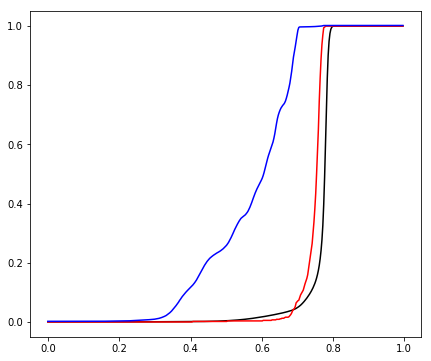

raw 01: 0.561  05: 0.704  10: 0.739 15: 0.756  90: 0.786  95: 0.791  99: 0.796
bg 01: 0.651  05: 0.694  10: 0.714 15: 0.729  90: 0.769  95: 0.771  99: 0.774
ext 01: 0.304  05: 0.356  10: 0.386 15: 0.421  90: 0.691  95: 0.699  99: 0.704


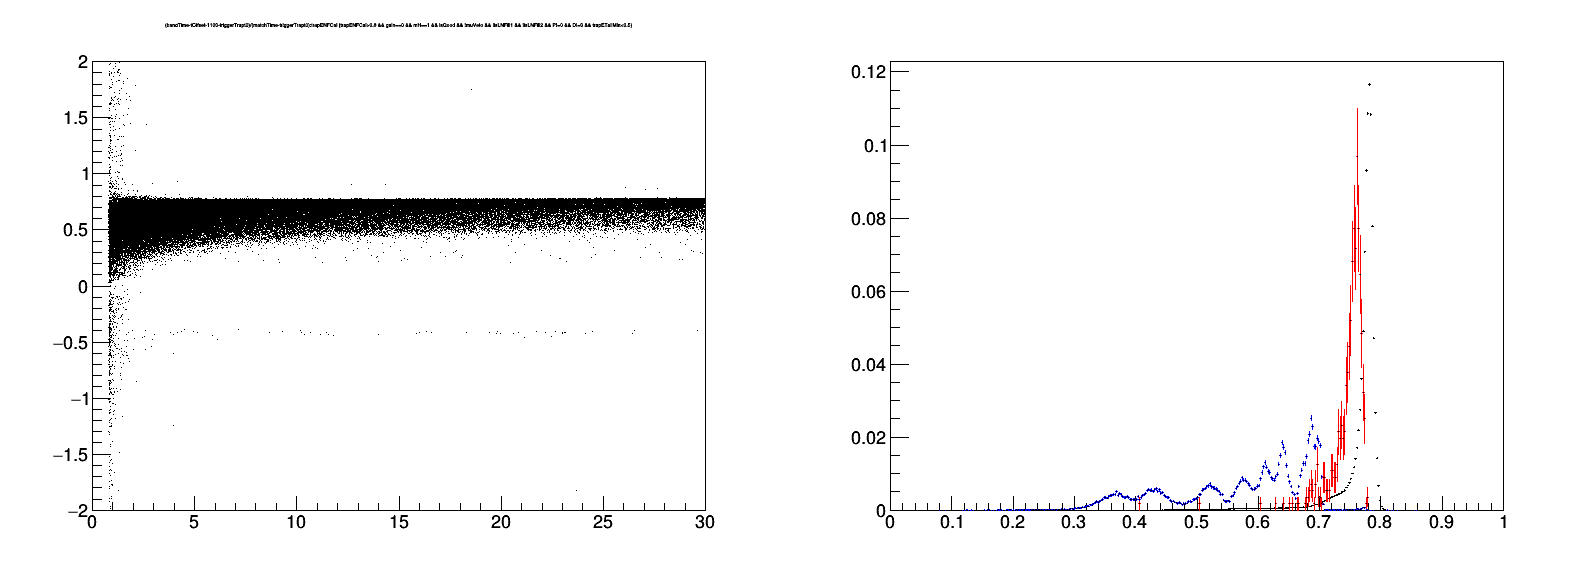

In [2]:
ds = 0
bins, lower, upper = 400,0.,1.

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
ExtCut = "(channel == 688 && mH==2) || channel==624"
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
Ext = ROOT.TChain("skimTree"); Ext.Add("~/project/ForceTrigger/latSkimDS0_run72*.root")

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0):trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
h02 = ROOT.TH1D("h02","",bins,lower,upper)
calib.Project("h0","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+"&& trapENFCal > 5")
bg.Project("h01","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+bgCut)
Ext.Project("h02","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",ExtCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
h02.Scale(1/h02.Integral()); h02.SetLineColor(ROOT.kBlue); h02.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01)
ext01,ext05,ext10,ext15,ext90,ext95,ext99 = GetIntegralPoints(h02)
print "raw 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (raw01,raw05,raw10,raw15,raw90,raw95,raw99)
print "bg 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (bg01,bg05,bg10,bg15,bg90,bg95,bg99)
print "ext 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (ext01,ext05,ext10,ext15,ext90,ext95,ext99)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
x2_h0, y2_h0 = npTH1D(h02)
int2_h0 = integFunc(y2_h0)
plt.plot(x2_h0,int2_h0,'blue')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

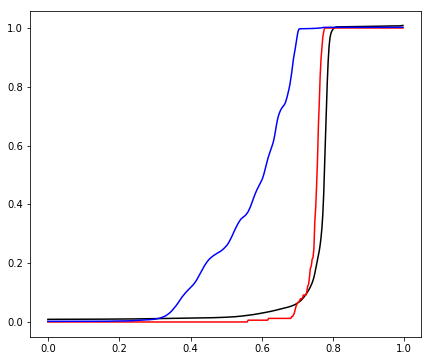

raw 01: 0.226  05: 0.674  10: 0.729 15: 0.746  90: 0.789  95: 0.791  99: 0.799
bg 01: 0.619  05: 0.696  10: 0.726 15: 0.734  90: 0.769  95: 0.771  99: 0.776
ext 01: 0.304  05: 0.356  10: 0.386 15: 0.421  90: 0.691  95: 0.699  99: 0.704


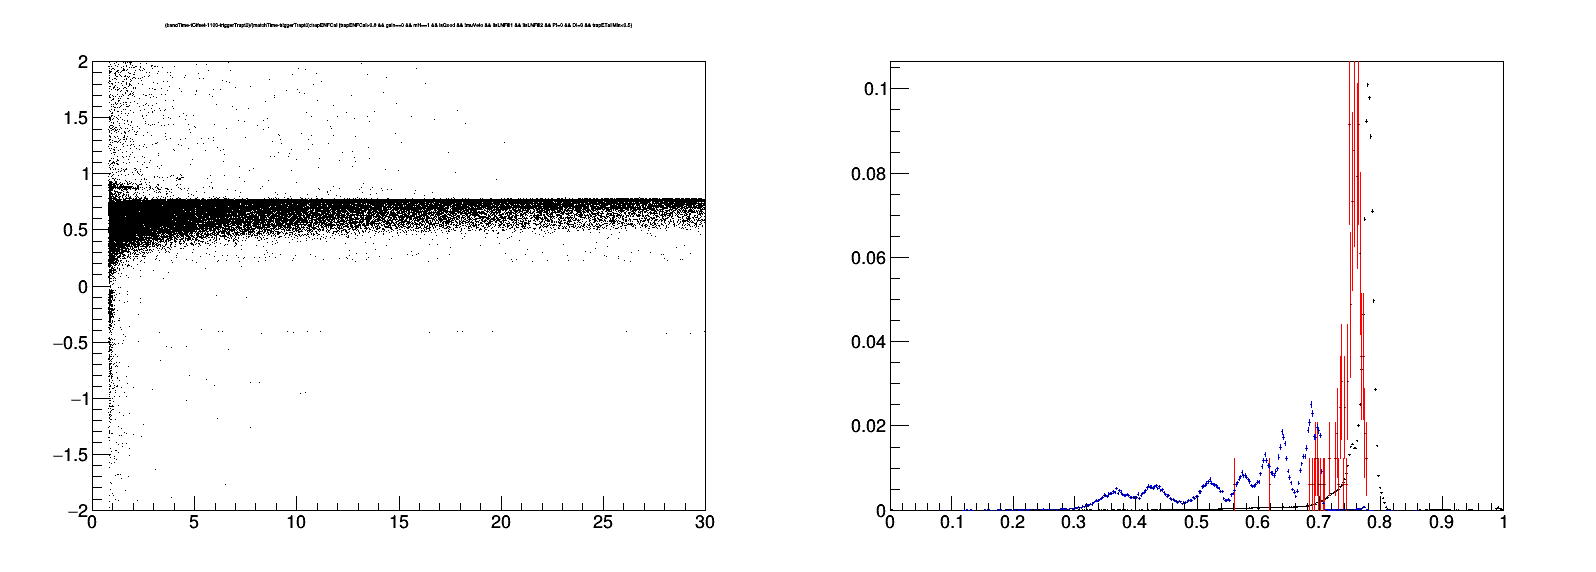

In [3]:
ds = 1
bins, lower, upper = 400,0.,1.

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
ExtCut = "(channel == 688 && mH==2) || channel==624"
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
Ext = ROOT.TChain("skimTree"); Ext.Add("~/project/ForceTrigger/latSkimDS0_run72*.root")

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0):trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
h02 = ROOT.TH1D("h02","",bins,lower,upper)
calib.Project("h0","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+"&& trapENFCal > 5")
bg.Project("h01","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+bgCut)
Ext.Project("h02","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",ExtCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
h02.Scale(1/h02.Integral()); h02.SetLineColor(ROOT.kBlue); h02.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01)
ext01,ext05,ext10,ext15,ext90,ext95,ext99 = GetIntegralPoints(h02)
print "raw 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (raw01,raw05,raw10,raw15,raw90,raw95,raw99)
print "bg 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (bg01,bg05,bg10,bg15,bg90,bg95,bg99)
print "ext 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (ext01,ext05,ext10,ext15,ext90,ext95,ext99)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
x2_h0, y2_h0 = npTH1D(h02)
int2_h0 = integFunc(y2_h0)
plt.plot(x2_h0,int2_h0,'blue')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

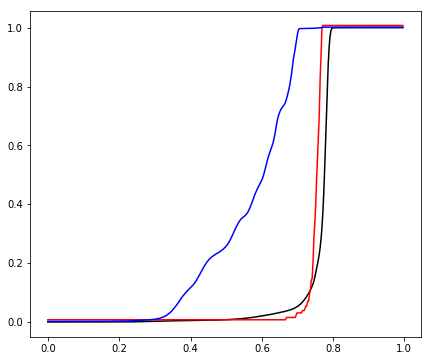

raw 01: 0.529  05: 0.696  10: 0.734 15: 0.749  90: 0.789  95: 0.791  99: 0.796
bg 01: 0.669  05: 0.724  10: 0.736 15: 0.744  90: 0.766  95: 0.769  99: 0.769
ext 01: 0.304  05: 0.356  10: 0.386 15: 0.421  90: 0.691  95: 0.699  99: 0.704


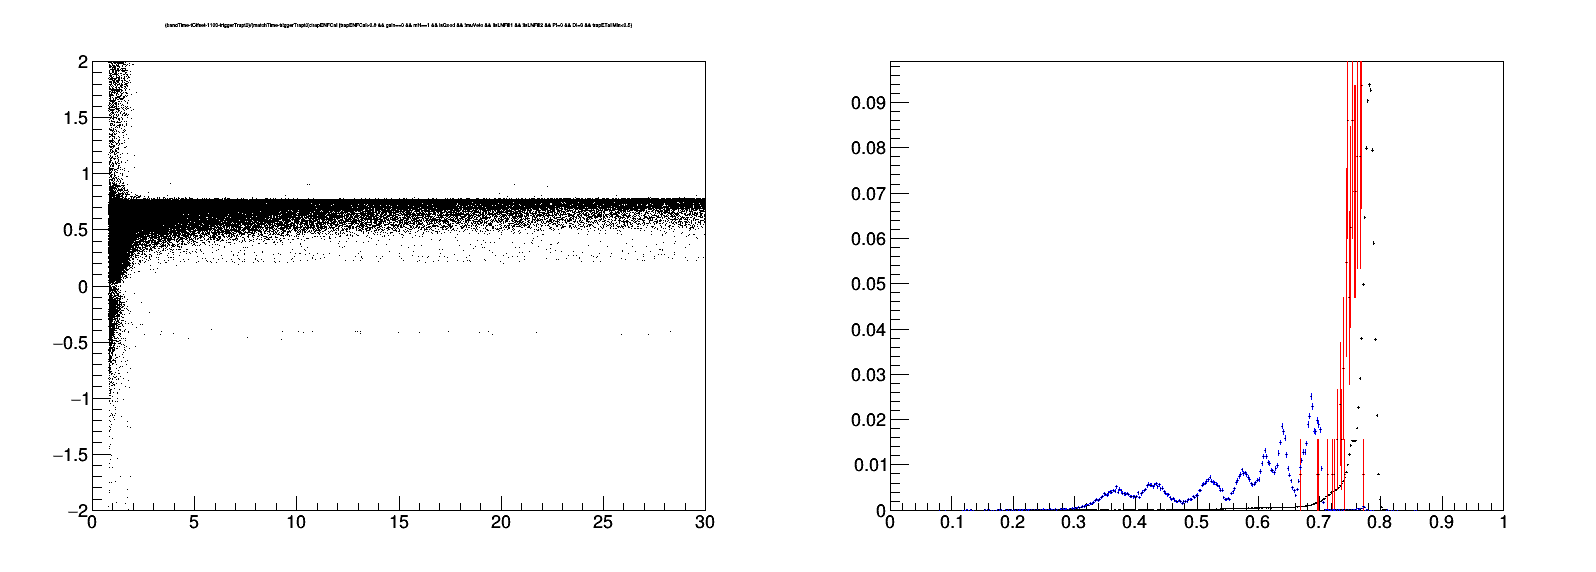

In [4]:
ds = 3
bins, lower, upper = 400,0.,1.

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
ExtCut = "(channel == 688 && mH==2) || channel==624"
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
Ext = ROOT.TChain("skimTree"); Ext.Add("~/project/ForceTrigger/latSkimDS0_run72*.root")

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0):trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
h02 = ROOT.TH1D("h02","",bins,lower,upper)
calib.Project("h0","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+"&& trapENFCal > 5")
bg.Project("h01","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+bgCut)
Ext.Project("h02","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",ExtCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
h02.Scale(1/h02.Integral()); h02.SetLineColor(ROOT.kBlue); h02.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01)
ext01,ext05,ext10,ext15,ext90,ext95,ext99 = GetIntegralPoints(h02)
print "raw 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (raw01,raw05,raw10,raw15,raw90,raw95,raw99)
print "bg 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (bg01,bg05,bg10,bg15,bg90,bg95,bg99)
print "ext 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (ext01,ext05,ext10,ext15,ext90,ext95,ext99)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
x2_h0, y2_h0 = npTH1D(h02)
int2_h0 = integFunc(y2_h0)
plt.plot(x2_h0,int2_h0,'blue')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

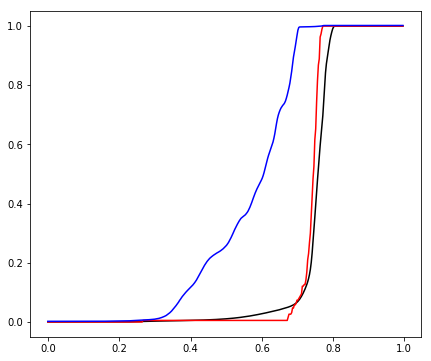

raw 01: 0.494  05: 0.674  10: 0.719 15: 0.734  90: 0.786  95: 0.791  99: 0.799
bg 01: 0.674  05: 0.691  10: 0.714 15: 0.726  90: 0.764  95: 0.764  99: 0.771
ext 01: 0.304  05: 0.356  10: 0.386 15: 0.421  90: 0.691  95: 0.699  99: 0.704


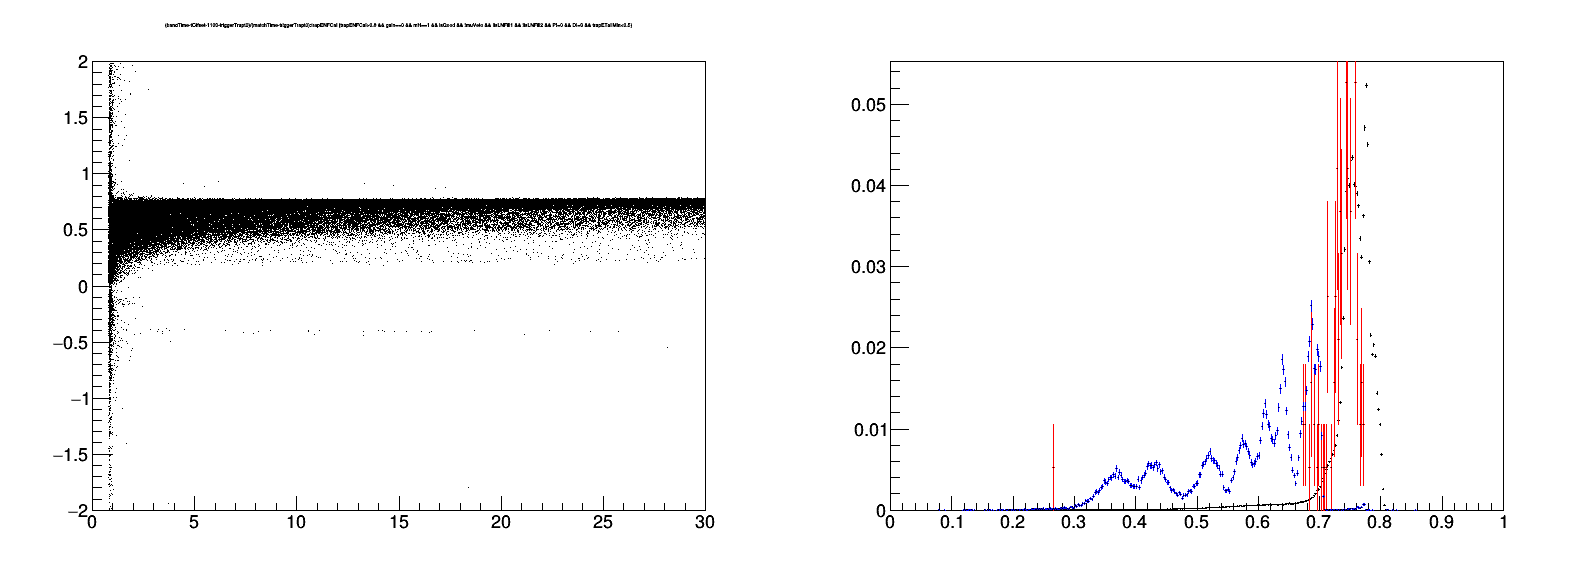

In [5]:
ds = 4
bins, lower, upper = 400,0.,1.

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
ExtCut = "(channel == 688 && mH==2) || channel==624"
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
Ext = ROOT.TChain("skimTree"); Ext.Add("~/project/ForceTrigger/latSkimDS0_run72*.root")

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0):trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
h02 = ROOT.TH1D("h02","",bins,lower,upper)
calib.Project("h0","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+"&& trapENFCal > 5")
bg.Project("h01","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+bgCut)
Ext.Project("h02","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",ExtCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
h02.Scale(1/h02.Integral()); h02.SetLineColor(ROOT.kBlue); h02.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01)
ext01,ext05,ext10,ext15,ext90,ext95,ext99 = GetIntegralPoints(h02)
print "raw 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (raw01,raw05,raw10,raw15,raw90,raw95,raw99)
print "bg 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (bg01,bg05,bg10,bg15,bg90,bg95,bg99)
print "ext 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (ext01,ext05,ext10,ext15,ext90,ext95,ext99)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
x2_h0, y2_h0 = npTH1D(h02)
int2_h0 = integFunc(y2_h0)
plt.plot(x2_h0,int2_h0,'blue')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

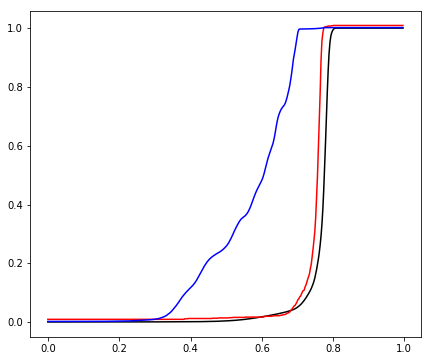

raw 01: 0.559  05: 0.701  10: 0.734 15: 0.751  90: 0.789  95: 0.791  99: 0.799
bg 01: 0.384  05: 0.689  10: 0.714 15: 0.731  90: 0.769  95: 0.769  99: 0.774
ext 01: 0.304  05: 0.356  10: 0.386 15: 0.421  90: 0.691  95: 0.699  99: 0.704


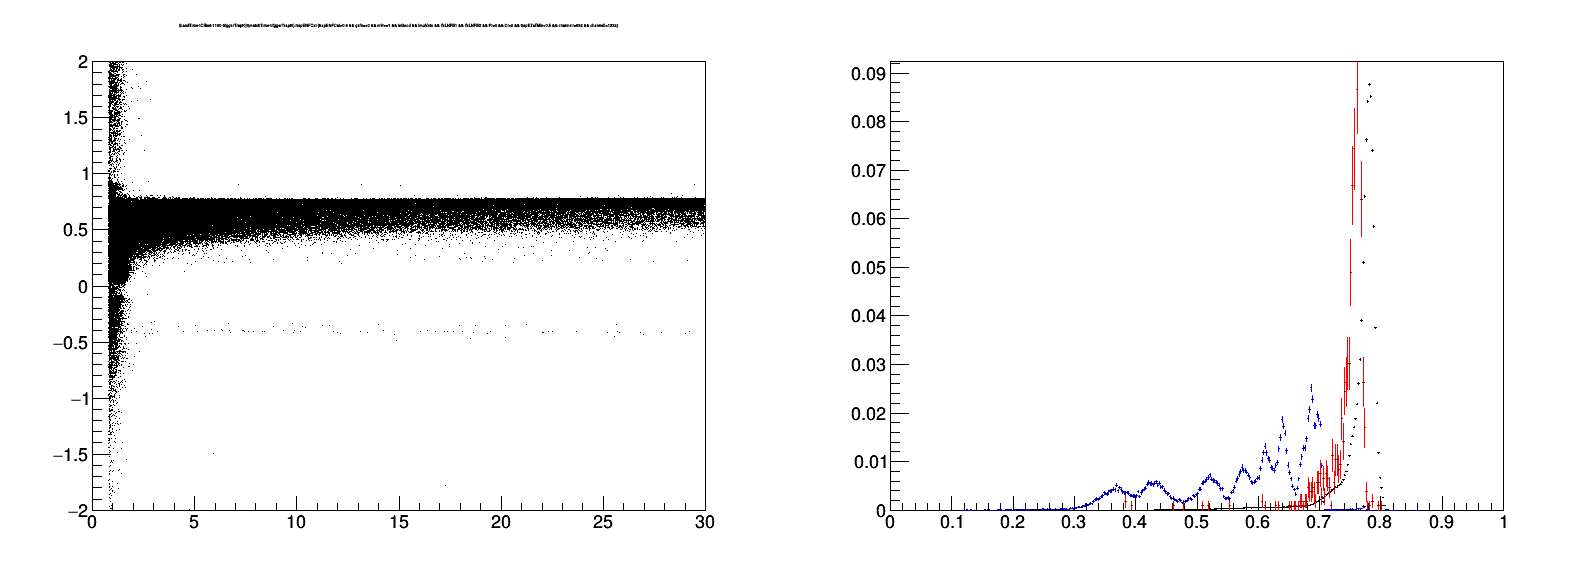

In [6]:
ds = 5
bins, lower, upper = 400,0.,1.

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
ExtCut = "(channel == 688 && mH==2) || channel==624"
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
Ext = ROOT.TChain("skimTree"); Ext.Add("~/project/ForceTrigger/latSkimDS0_run72*.root")

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0):trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
h02 = ROOT.TH1D("h02","",bins,lower,upper)
calib.Project("h0","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+"&& trapENFCal > 5")
bg.Project("h01","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+bgCut)
Ext.Project("h02","(bandTime-tOffset-1100-triggerTrapt0)/(matchTime-triggerTrapt0)",ExtCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
h02.Scale(1/h02.Integral()); h02.SetLineColor(ROOT.kBlue); h02.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01)
ext01,ext05,ext10,ext15,ext90,ext95,ext99 = GetIntegralPoints(h02)
print "raw 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (raw01,raw05,raw10,raw15,raw90,raw95,raw99)
print "bg 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (bg01,bg05,bg10,bg15,bg90,bg95,bg99)
print "ext 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (ext01,ext05,ext10,ext15,ext90,ext95,ext99)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
x2_h0, y2_h0 = npTH1D(h02)
int2_h0 = integFunc(y2_h0)
plt.plot(x2_h0,int2_h0,'blue')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()